In [12]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl.utils.dataframe import dataframe_to_rows
import os
#import xlwt
from openpyxl import load_workbook
import time
import math

In [2]:
measurement_pd = pd.read_csv('measurement24_0.1.csv',index_col=0,header=0) #有列標籤 ＃沒有行標籤
response_pd = pd.read_csv('response24_0.1.csv',index_col=0,header=0)

In [3]:
#將 DataFrame 轉為 array
measurement = measurement_pd.values
response = response_pd.values

In [4]:
measurement = measurement/max(measurement)

In [5]:
print(measurement.shape)
print(response.shape)

(990, 1)
(990, 98)


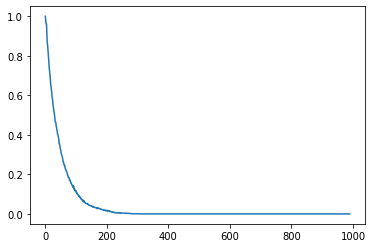

In [6]:
plt.plot(measurement)

In [7]:
print(measurement)

[[1.00000000e+00]
 [9.84496124e-01]
 [9.68992248e-01]
 [9.61240310e-01]
 [9.61240310e-01]
 [9.14728682e-01]
 [8.75968992e-01]
 [8.60465116e-01]
 [8.44961240e-01]
 [8.21705426e-01]
 [7.98449612e-01]
 [7.68992248e-01]
 [7.51937984e-01]
 [7.35658915e-01]
 [7.21705426e-01]
 [7.04651163e-01]
 [6.90697674e-01]
 [6.64341085e-01]
 [6.49612403e-01]
 [6.41860465e-01]
 [6.22480620e-01]
 [6.17054264e-01]
 [5.91472868e-01]
 [5.84496124e-01]
 [5.72093023e-01]
 [5.53488372e-01]
 [5.41860465e-01]
 [5.27131783e-01]
 [5.20155039e-01]
 [5.13178295e-01]
 [4.99224806e-01]
 [4.83720930e-01]
 [4.72093023e-01]
 [4.63565891e-01]
 [4.64341085e-01]
 [4.49612403e-01]
 [4.40310078e-01]
 [4.28682171e-01]
 [4.19379845e-01]
 [4.13953488e-01]
 [4.04651163e-01]
 [4.01550388e-01]
 [3.91472868e-01]
 [3.79069767e-01]
 [3.74418605e-01]
 [3.55038760e-01]
 [3.55813953e-01]
 [3.45736434e-01]
 [3.37209302e-01]
 [3.31007752e-01]
 [3.23255814e-01]
 [3.13178295e-01]
 [3.03875969e-01]
 [3.00000000e-01]
 [2.94573643e-01]
 [2.883720

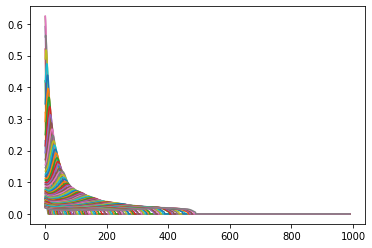

In [8]:
plt.plot(response)

In [13]:
N = response.shape[0]
M = response.shape[1]

In [75]:
tStart = time.time()
W=np.zeros((int(len(response[:,0])),int(len(response[0,:]))))
#print(W)
flux_total = np.arange(0.3,10.1,0.1)[:,np.newaxis]

#flux= np.zeros[0,]
for K in np.arange(0,500,1): # 迭代次數
    print('========================================= \n=========================================')
    print('interative loop K is : ' ,K)
    if K==0:
        flux=np.array([1]*98)[:,np.newaxis]
        flux_R=[]
    if K!= 0:
        #print(flux_R)
        flux =[]
        for i  in np.arange(0,len(flux_R),1):
            flux = np.append(flux,flux_R[i])[:,np.newaxis]
    flux_R =[]
    #print('START flux' , flux)
    for j in np.arange(0,len(response[0,:]),1):
        upper_total = 0
        lower_total = 0
        for i in np.arange(0,len(response[:,0]),1):
            # print('\n  i: ',i,'  j:  ',j)
            n=0
            # print('===========================')
            # print('R = ', ReponseFunction_norm[i,j])
            # print('flux = ', j , flux[j,0])
            
            weight = response[i,:].dot(flux[:,0])
            # print('weight = ',  weight)
            # print('measure = ' , neutron_response_norm_inter[i])
            if measurement[i] <0 :
                #print(i , neutron_response_norm_inter[i])
                measurement[i] =0
            
            W[i,j] = ((response[i,j]*flux[j,0]/weight)*(measurement[i]))
            # print('W = ' , W[i,j])
            ln_function = (measurement[i]/weight)
            # print('ln = ',ln_function)
            upper=W[i,j]*np.log(ln_function)
            lower=W[i,j]
            x = float(upper) 
            y = float(lower) 
            if math.isnan(x) is True:
                upper =0
            if math.isnan(y) is True:
                lower =0
            # print('upper = ',  upper)
            
            upper_total += upper
            lower_total += lower
        #print('upper = ',upper_total,'Lower = ', lower_total)
        flux_R = np.append(flux_R,flux[j,0]*np.exp(upper_total/lower_total))
        #print(flux_R)
    print('Flux_R = ',flux_R)
    flux_total=np.column_stack((flux_total,flux_R))
    aa = np.dot(response,flux_total[:,-1])
    aa = np.reshape(aa,(990,1))
    #print(np.square(aa-measurement))
    error = (np.square(aa-measurement))/measurement
    #print(error)
    omega = sum(error)
    #print('omega = ',omega)
    if omega < 0.043:
        print(flux_total[:,-1])
        print('omega = ',omega)
        break
    


tEnd = time.time()
print('Complete \n Time cost: ', np.round(tEnd-tStart,3), ' s')

interative loop K is :  0


<ipython-input-75-019fe82a7c79>:41: RuntimeWarning: divide by zero encountered in log
  upper=W[i,j]*np.log(ln_function)
<ipython-input-75-019fe82a7c79>:41: RuntimeWarning: invalid value encountered in multiply
  upper=W[i,j]*np.log(ln_function)
<ipython-input-75-019fe82a7c79>:37: RuntimeWarning: invalid value encountered in double_scalars
  W[i,j] = ((response[i,j]*flux[j,0]/weight)*(measurement[i]))
<ipython-input-75-019fe82a7c79>:39: RuntimeWarning: invalid value encountered in true_divide
  ln_function = (measurement[i]/weight)


Flux_R =  [0.09933794 0.09978616 0.10034041 0.10094666 0.10160518 0.10233805
 0.10317182 0.10384258 0.10445126 0.10498617 0.10546626 0.10571142
 0.10580218 0.10572931 0.10544161 0.1049824  0.10416854 0.10350203
 0.10254406 0.10133015 0.10034645 0.09887036 0.09766714 0.09607134
 0.09480337 0.09322002 0.09185867 0.08994358 0.08880505 0.08714086
 0.08596201 0.08477661 0.0833031  0.08180982 0.08054337 0.07902969
 0.07765764 0.07584373 0.07480068 0.07363194 0.07192074 0.07069218
 0.06938696 0.06790809 0.06682941 0.06577714 0.06478206 0.06366006
 0.0629986  0.06231349 0.06165599 0.0613136  0.06059299 0.06012107
 0.05986856 0.06008667 0.06006411 0.06008127 0.06016936 0.06000929
 0.06098421 0.0598971  0.05998398 0.0595051  0.05912447 0.05902776
 0.05860255 0.05882845 0.05929828 0.05998538 0.0607486  0.06207392
 0.06197003 0.06189566 0.06244004 0.06248706 0.06244182 0.06321537
 0.06439252 0.06425321 0.06292417 0.06217085 0.06235006 0.06233245
 0.06267194 0.06268618 0.06299464 0.06255447 0.06330

<ipython-input-75-019fe82a7c79>:61: RuntimeWarning: divide by zero encountered in true_divide
  error = (np.square(aa-measurement))/measurement
<ipython-input-75-019fe82a7c79>:61: RuntimeWarning: invalid value encountered in true_divide
  error = (np.square(aa-measurement))/measurement


Flux_R =  [0.10622474 0.10722335 0.10847639 0.10986641 0.11140311 0.1131572
 0.11522296 0.11694983 0.11859438 0.12015445 0.12176464 0.12277382
 0.12359774 0.12402659 0.12404144 0.12370054 0.12271606 0.12180411
 0.12031085 0.11833853 0.11664208 0.1140564  0.11186949 0.10897538
 0.10664067 0.10365106 0.10108274 0.09768961 0.09551472 0.09232672
 0.09013163 0.08787274 0.08511125 0.08231683 0.07998187 0.07719728
 0.07464911 0.0713536  0.06951778 0.06741534 0.06445246 0.06229099
 0.06006386 0.05748236 0.05570447 0.0539084  0.05225366 0.0504908
 0.04941848 0.0482932  0.04715845 0.04660954 0.04545329 0.04457369
 0.04411675 0.04423405 0.04403282 0.0438711  0.0438827  0.0435392
 0.04484881 0.04310397 0.04318718 0.04247588 0.04201273 0.0418543
 0.04126018 0.04152033 0.0420849  0.04304245 0.04402232 0.04585928
 0.045754   0.04567754 0.04649363 0.04662641 0.0465542  0.04765696
 0.0494278  0.04925378 0.04742655 0.04641752 0.04669352 0.04669982
 0.04719399 0.04725921 0.04767164 0.04718235 0.04820377 

In [15]:
tEnd-tStart

NameError: name 'tEnd' is not defined

Text(0, 0.5, 'fluence')

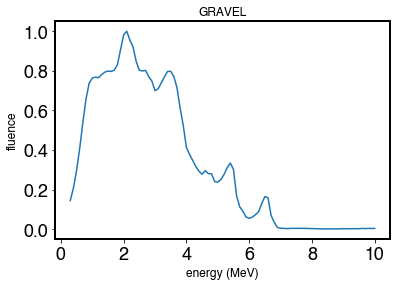

In [76]:
plt.plot(flux_total[:,0],(flux_total[:,-1]/flux_total[:,-1].max()))
plt.title('GRAVEL')
plt.xlabel('energy (MeV)',fontsize=12)
plt.ylabel('fluence',fontsize=12)
#plt.plot(flux_total[:,0],(flux_total[:,-1]))

In [77]:
ISO_spectrum = np.loadtxt('Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('Neutron_spectrum/Scherzinger_2015.txt')

In [78]:
def fig_pre_def(figsize_x=8, figsize_y=6,fontsize=18):
    plt.rc('font', family='Helvetica')         # 自型
    plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度
    return plt.figure(figsize=(figsize_x,figsize_y)) 

In [79]:
def fig_post_def(x_ma=None, x_mi=None, y_ma=None, y_mi=None, 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None):
    if x_ma or x_mi != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(x_ma))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(x_mi))    
    if y_ma or y_mi != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(y_ma))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(y_mi))
    
    ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=18)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=18)
    plt.legend(fontsize=18)

<Figure size 576x432 with 0 Axes>

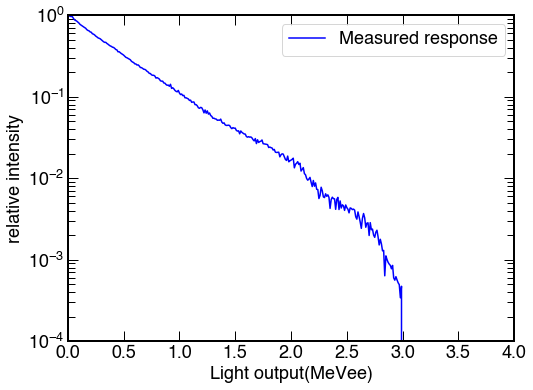

In [80]:
fig_pre_def()
fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.plot(x_axis,measurement,'b',label='Measured response' )

fig_post_def(xlim=(0,4),ylim=(0.0001,1),xlabel ='Light output(MeVee)',ylabel='relative intensity')
plt.yscale('log')

In [81]:
x_axis= np.arange(0,len(response.dot(flux_total[:,2])),1)*0.01

<ipython-input-85-d9a8b6779d0d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,12))


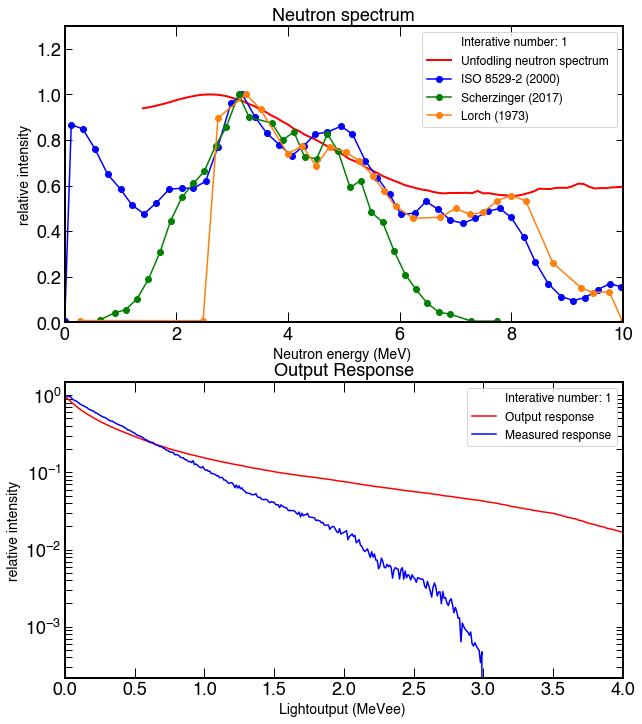

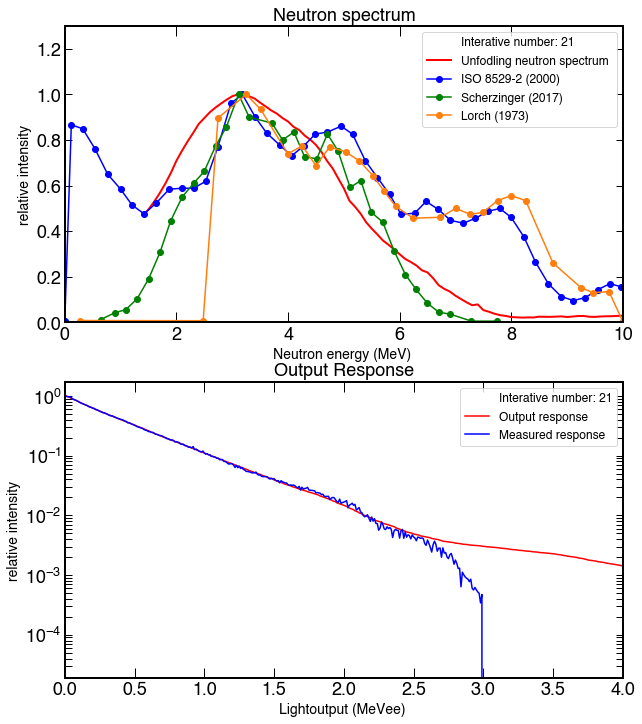

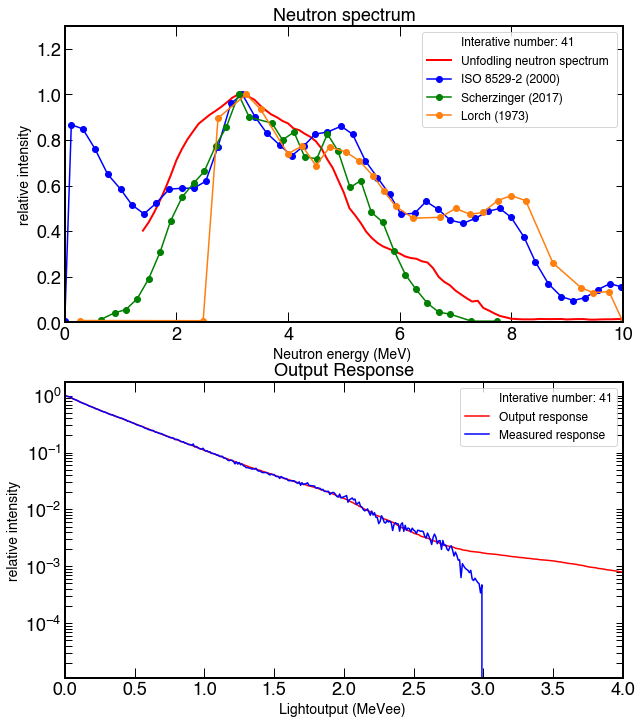

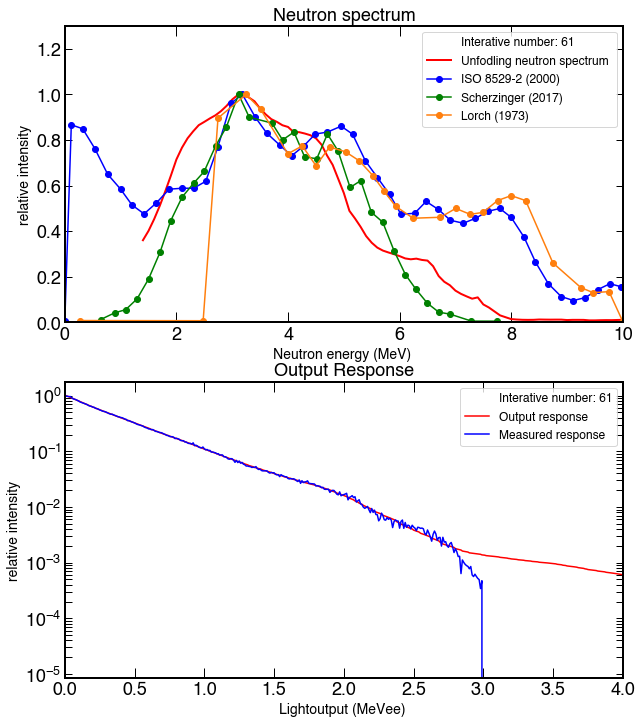

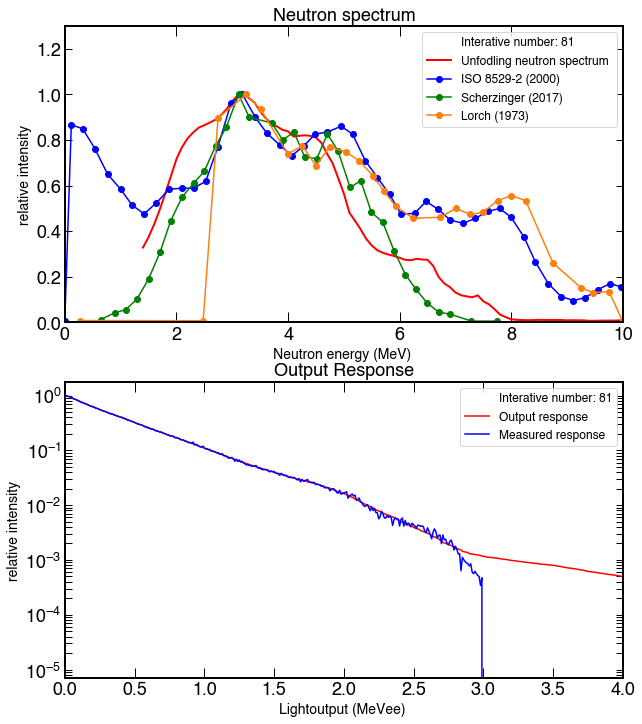

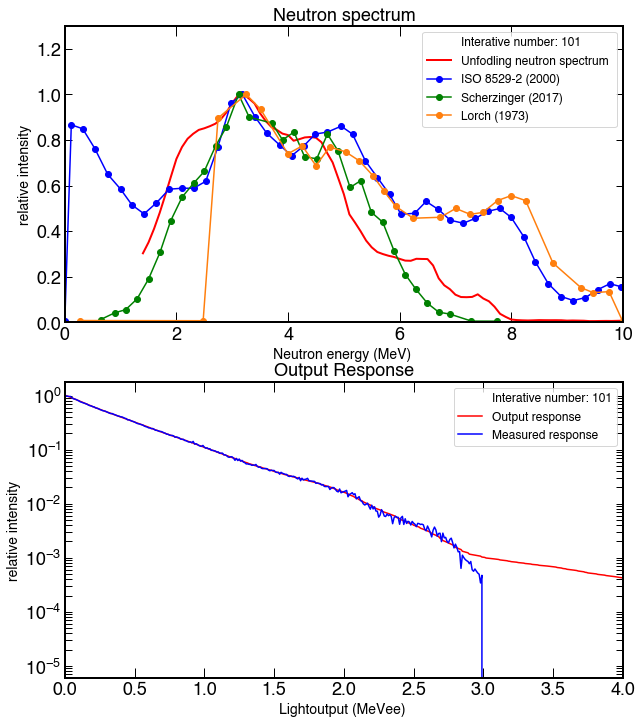

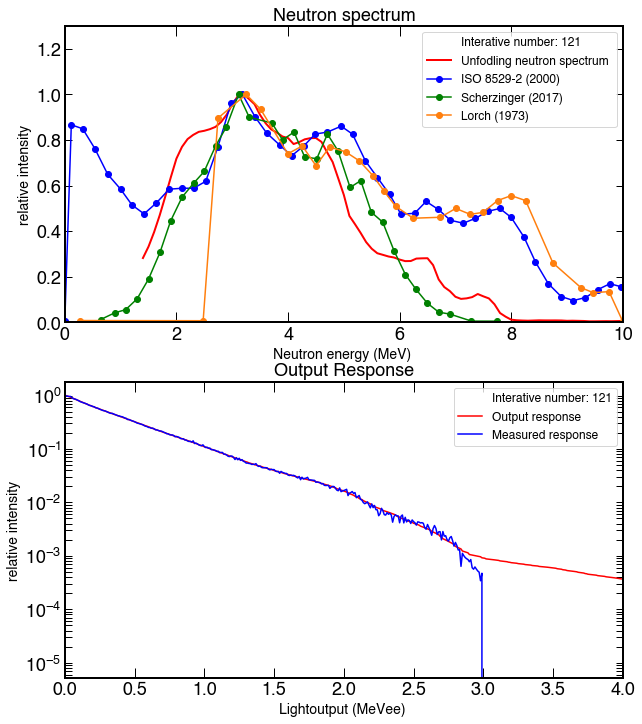

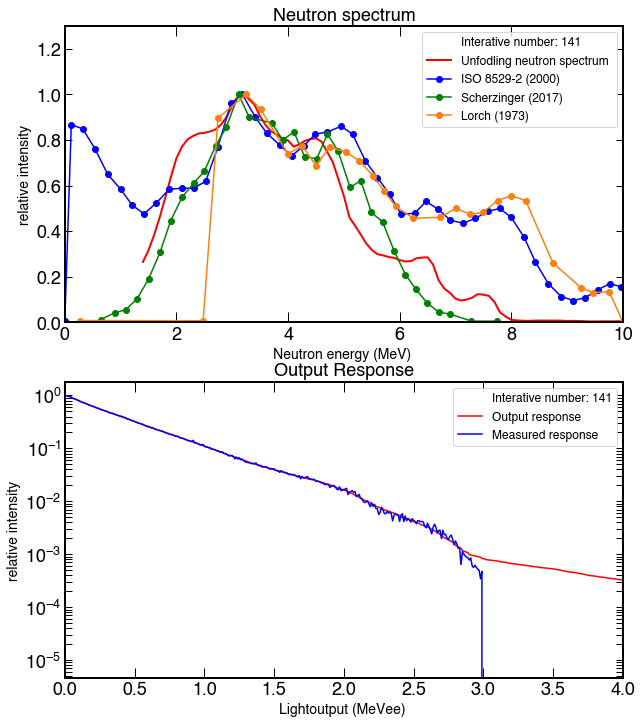

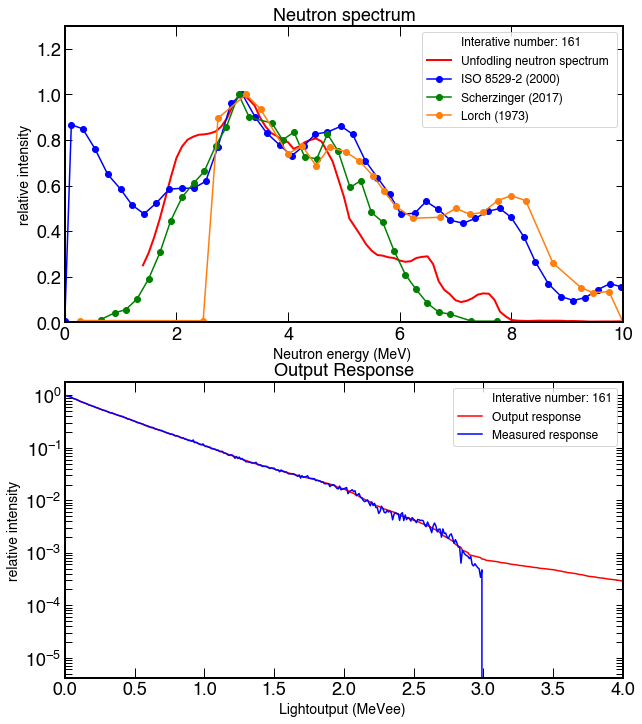

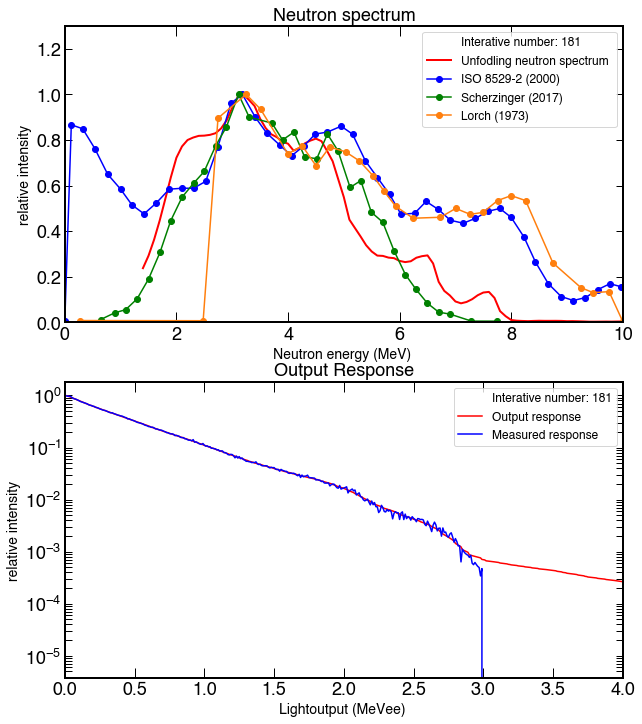

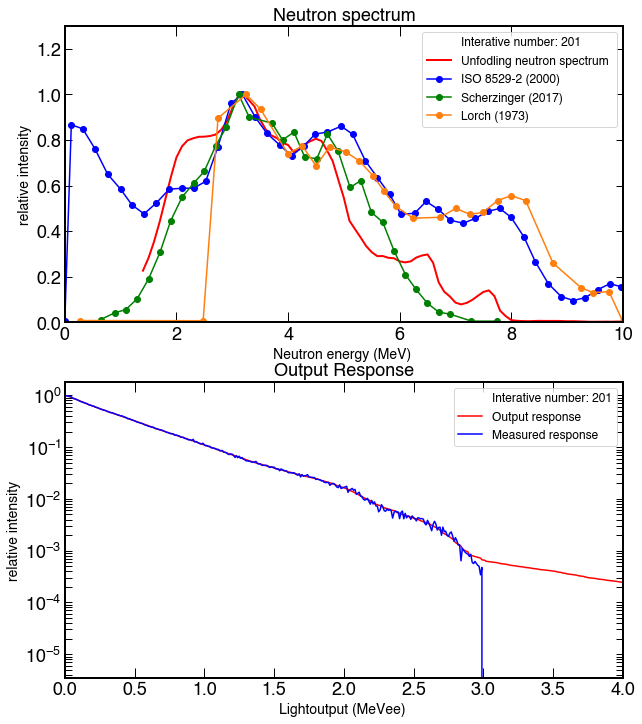

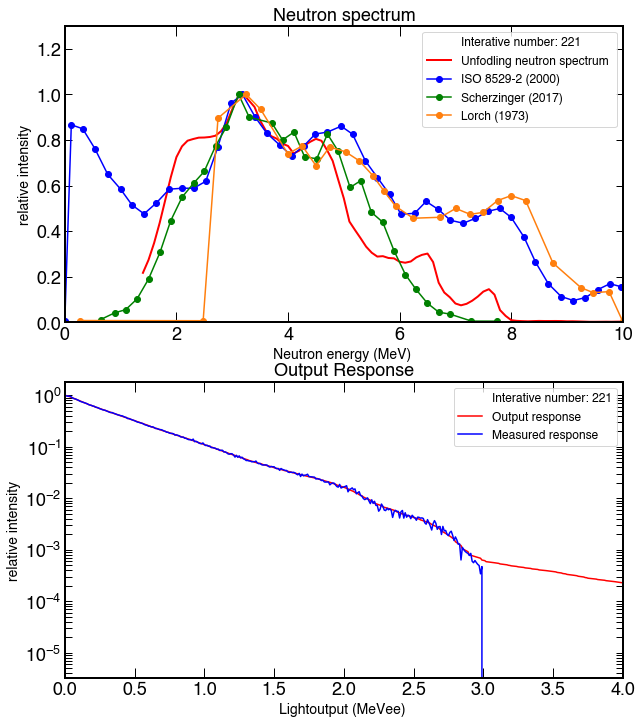

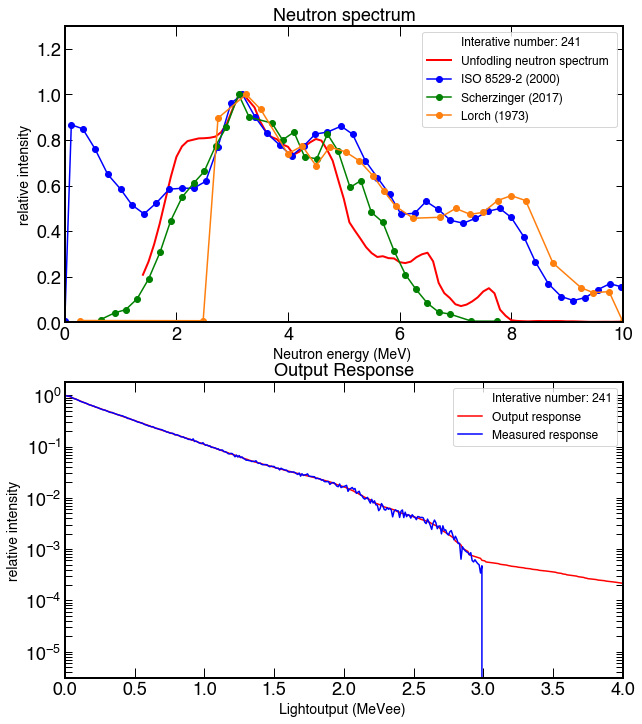

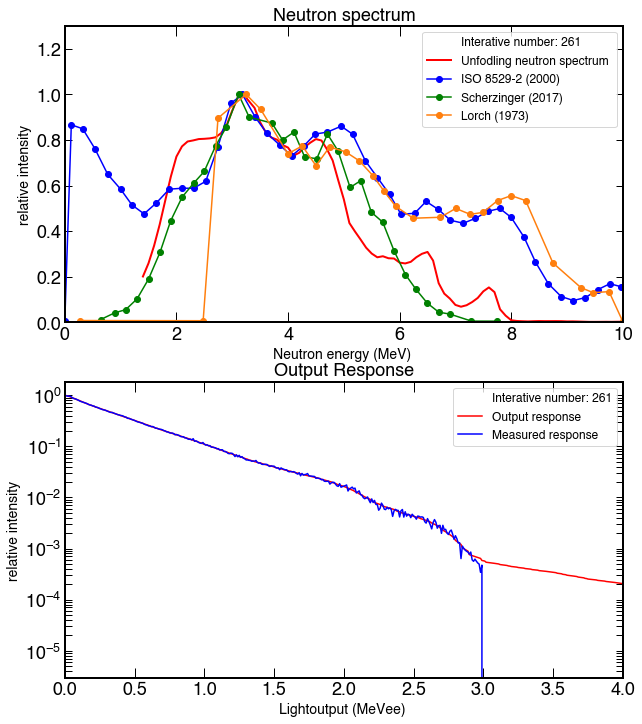

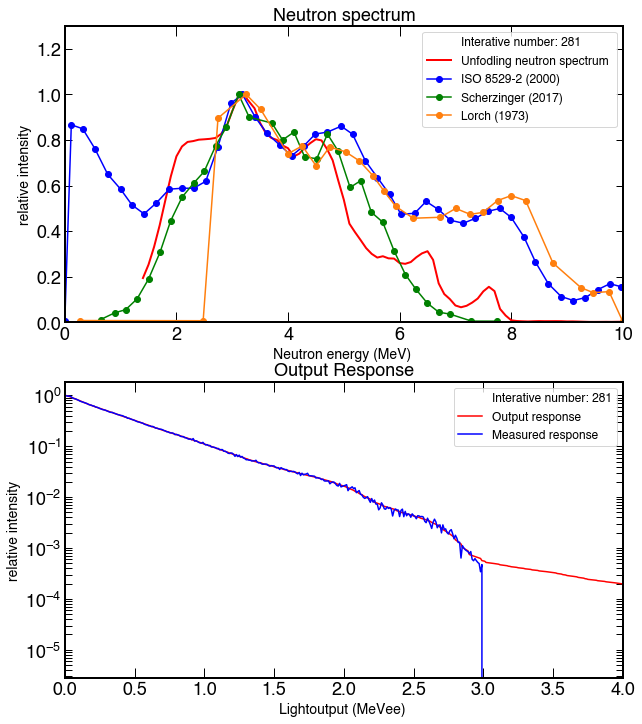

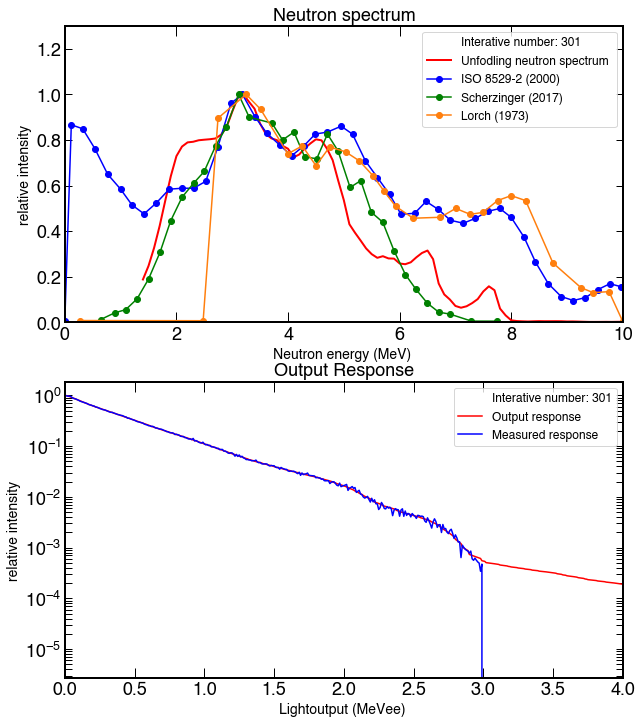

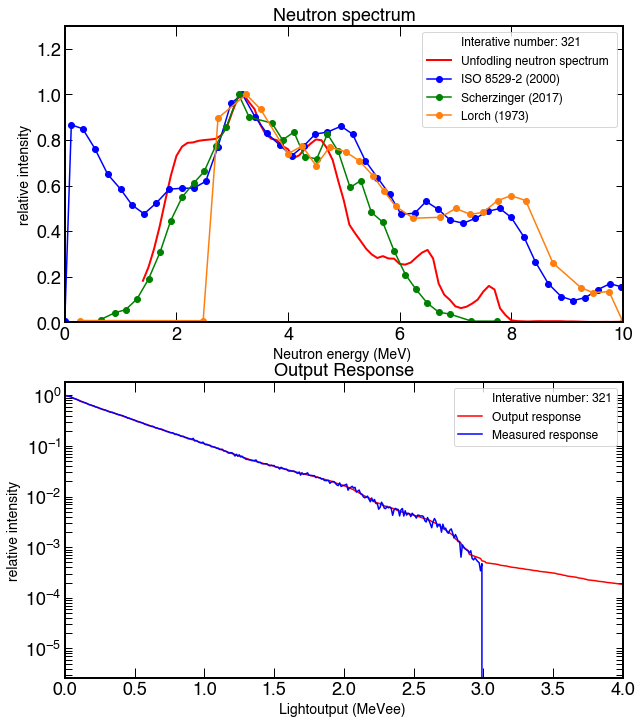

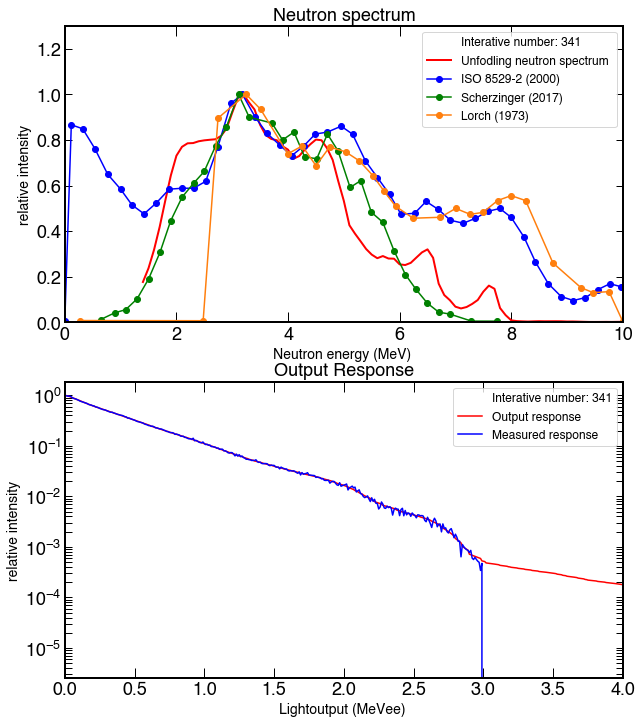

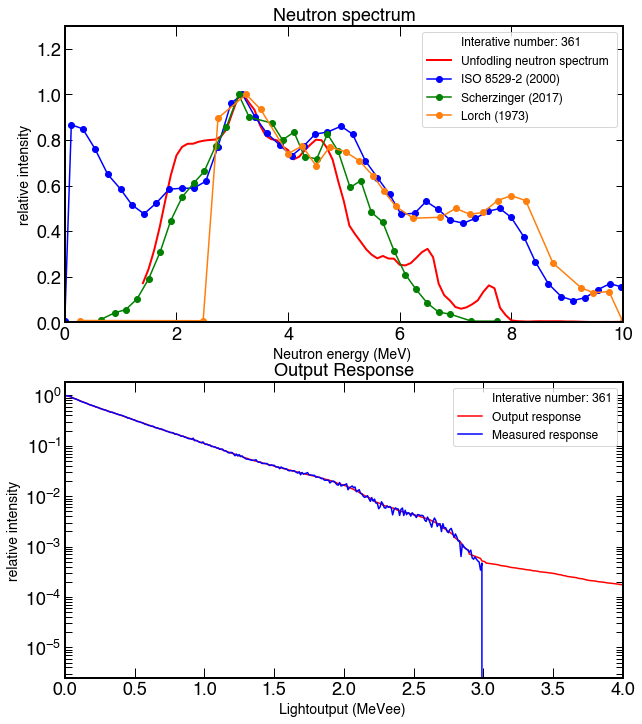

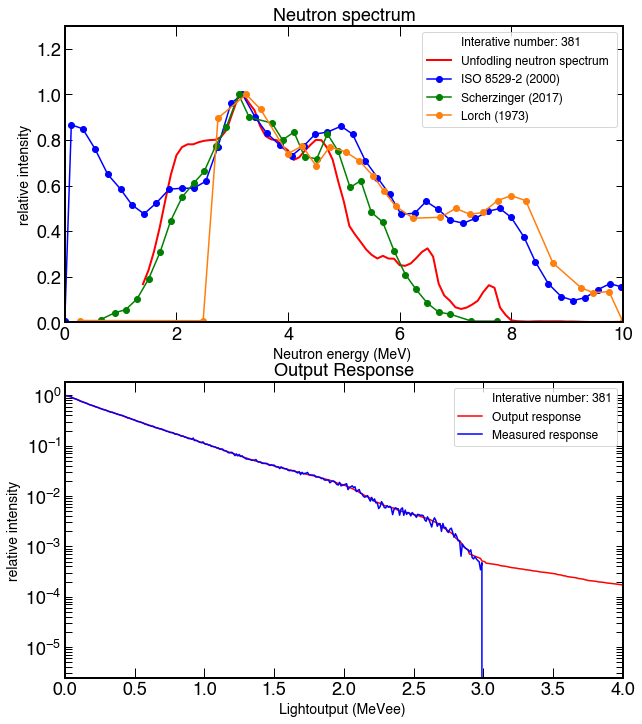

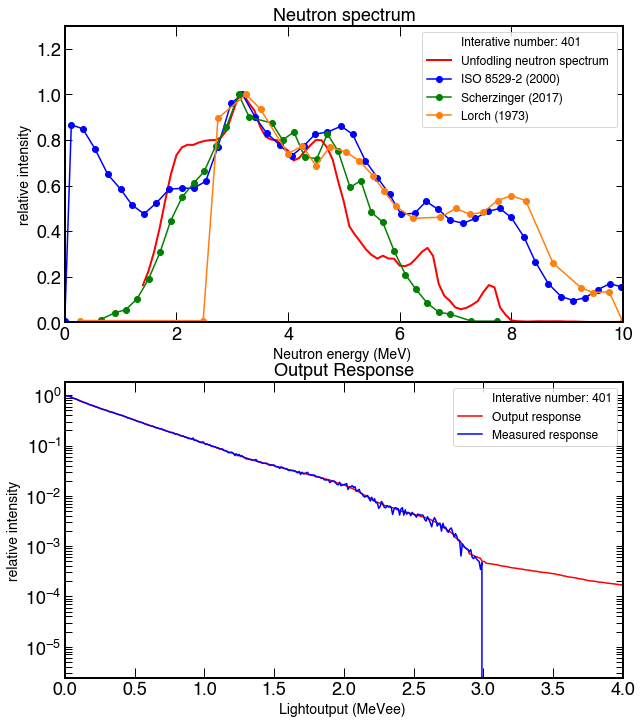

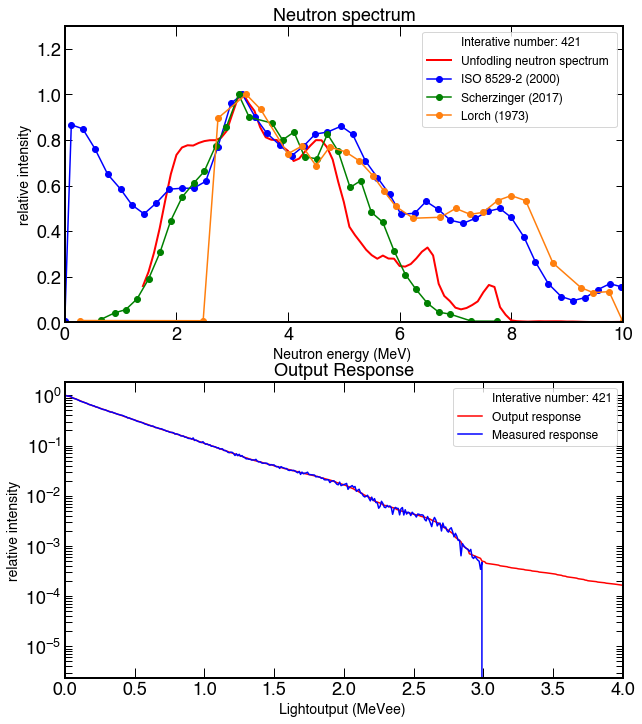

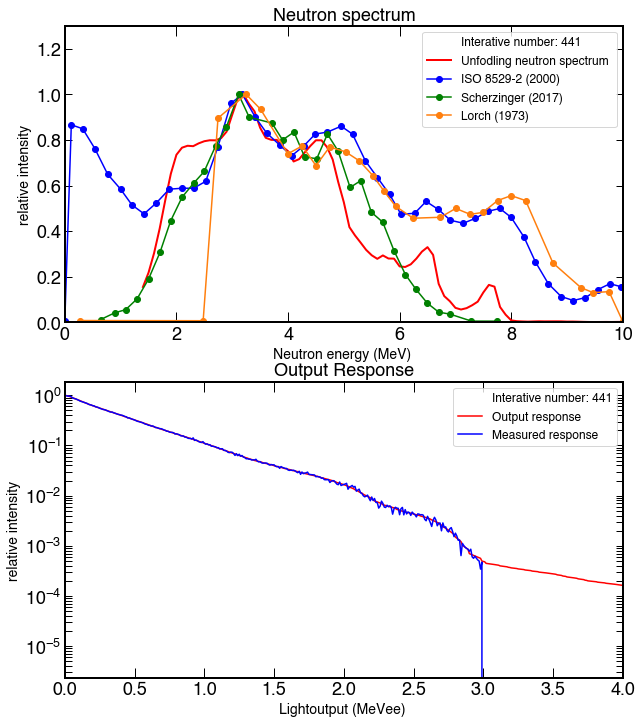

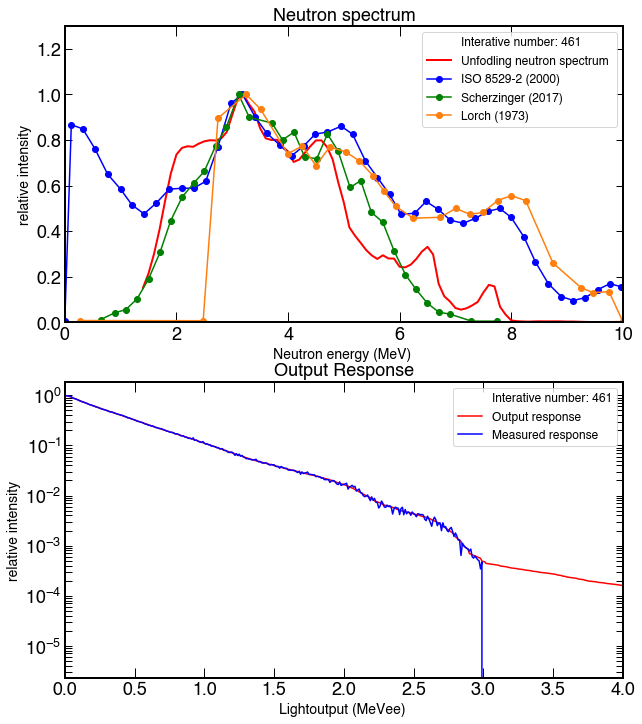

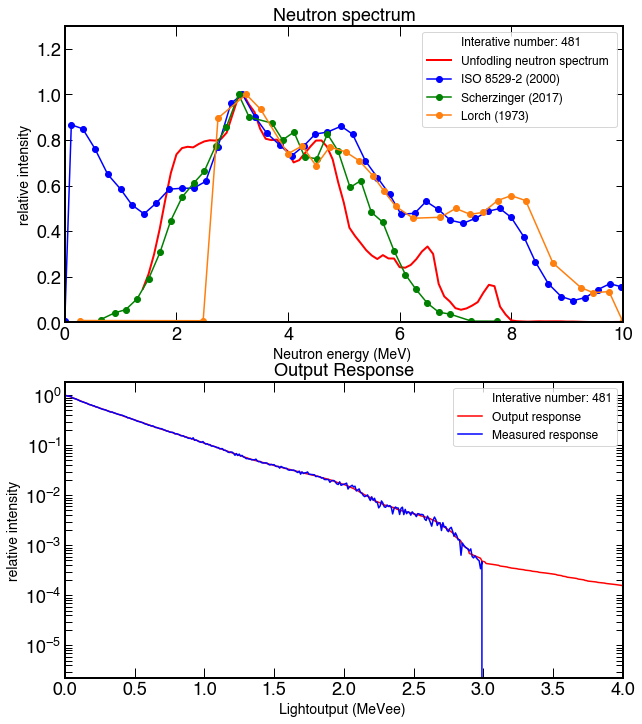

In [85]:
for i in np.arange(1 , len(flux_total[0,:500]),20):
    fig = plt.figure(figsize=(10,12)) 
    # 第一張圖
    ax = fig.add_subplot(2, 1, 1)          # 產生2x1格圖片、在第一格
    ax.plot([],[],' ',label='Interative number: '+ str(i) )  # 繪圖資料
    ax.plot(1.1+flux_total[:,0],flux_total[:,i]/(flux_total[:,i].max()),'r',linewidth=2,label='Unfodling neutron spectrum ' )  # 繪圖資料
    #ax.plot(TOF_exp[:,0],TOF_exp[:,1],'.r',label ='our experiment')
    ax.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-b',label='ISO 8529-2 (2000)')
    ax.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
    #ax.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
    ax.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')
    # Edit the major and minor tick locations 設定格線
    #ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    #ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
    #ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
    #ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

    ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
    ax.set_ylabel('relative intensity',fontsize=14)
    ax.set_xlabel('Neutron energy (MeV) ',fontsize=14)
    ax.set_title('Neutron spectrum',fontsize=18)
    ax.set_ylim(0,1.3)
    #ax.set_xlim(0,100)
    #ax.set_xticks(np.arange(0,110,10))
    plt.legend(fontsize=12)
    plt.xlim(0,10)
    
    # 第二張圖 output spectrum
    ax = fig.add_subplot(2, 1, 2)          # 產生2x1格圖片、在第二格
    ax.plot([],[],' ',label='Interative number: '+ str(i) )  # 繪圖資料
    ax.plot(x_axis,response.dot(flux_total[:,i]),'r',label='Output response' )  # 繪圖資料
    #ax.plot(new_x,neutron_response_norm_inter,'b',label= 'Experiment measurement')
    ax.plot(x_axis,measurement,'b',label='Measured response' )  
    
    # Edit the major and minor tick locations 設定格線
    #ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    #ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
    #ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
    #ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

    ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
    ax.set_title('Output Response',fontsize=18)
    ax.set_ylabel('relative intensity',fontsize=14)
    ax.set_xlabel('Lightoutput (MeVee) ',fontsize=14)
    plt.legend(fontsize=12)
    ax.set_xlim(0,4)
    plt.yscale('log')
    plt.savefig('output/unfolding'+str(i)+'.png')

In [214]:
print(flux_total[:,-1])
farr = flux_total[:,-1]

[2.53373802e-01 1.83012898e-01 9.05690603e-02 7.99633734e-02
 7.31373269e-02 7.33712234e-02 9.71463311e-02 1.71348968e-01
 3.82229175e-01 1.03567551e+00 3.07590313e+00 6.67099602e+00
 7.41727268e+00 3.73104461e+00 1.43493935e+00 6.04690166e-01
 3.78326008e-01 3.03994729e-01 3.00023441e-01 3.17882776e-01
 3.49268704e-01 3.73013771e-01 3.91502083e-01 3.98128312e-01
 4.02117750e-01 4.10076981e-01 4.53270864e-01 5.45132502e-01
 6.97183706e-01 9.20098384e-01 1.21334809e+00 1.68127810e+00
 2.28151291e+00 2.79528579e+00 2.81821061e+00 2.53775400e+00
 2.04352916e+00 1.71128853e+00 1.52513712e+00 1.47929193e+00
 1.56358037e+00 1.76325487e+00 2.13143677e+00 2.50219314e+00
 2.70584543e+00 2.66597427e+00 2.64114124e+00 2.73980162e+00
 3.16875666e+00 3.87287490e+00 4.17479814e+00 3.79945076e+00
 2.74683940e+00 1.62881261e+00 9.15119471e-01 5.36803927e-01
 3.57624427e-01 2.91220977e-01 2.70141695e-01 3.16418642e-01
 3.96599001e-01 5.79050966e-01 9.05434399e-01 1.53051803e+00
 2.41183153e+00 3.383463

# 設定omega

In [194]:
print(omega)

[0.02996077]


In [195]:
print(np.shape(farr))
print(farr[0])

(76,)
4.948544471797948


In [196]:
print(M)

76


In [197]:
F = sum(farr)
print(F)

120.34192342491966


In [198]:
P = []
for i in range(M):
    temp = farr[i]/F
    print(temp)
    P.append(temp)
print(P)

0.04112070283541134
0.02143266404339815
0.004011435253076112
0.0022777385546529976
0.0012844701730616596
0.0007585269230812722
0.0006705759995222076
0.0009114111454648759
0.0017592606465109853
0.005108419717866208
0.02057512114334861
0.06115117160755164
0.07275088363689901
0.02781508456361946
0.0077597777810161465
0.002854858745673362
0.0020482303162315187
0.0020866860040086046
0.002629440298510961
0.0032681023233628215
0.003914692198245638
0.004162993689054749
0.004126449089813425
0.0038483453796860976
0.0034867515557903054
0.003154803388579896
0.003245483994060168
0.00384527634220956
0.004949787027352705
0.006609049651607267
0.008846435919560967
0.013151618642292478
0.01984247172343055
0.026134453070070146
0.026127335059987145
0.021866396938287267
0.01594945158201964
0.012463635733935541
0.010976474326506632
0.010957260540199628
0.01213149340782326
0.01485469246887759
0.019567352680218253
0.02396513157082398
0.02485601926631231
0.021555943051567453
0.0189539194203277
0.01861280386872

In [199]:
S = 0
for i in range(M):
    temp = -P[i]*math.log(P[i])
    S = S + temp
print(S)

3.8141532683903057


Text(0, 0.5, 'Shannon entropy ln(S($\\chi^2$))')

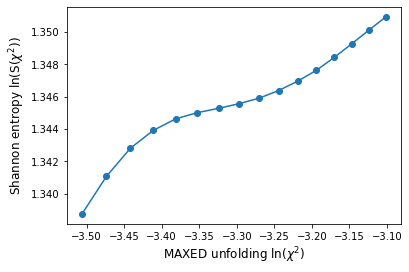

In [200]:
x1 = [-3.506557897, -3.473768074, -3.442019376, -3.411247718, -3.381394754, -3.352407217, -3.324236341,
      -3.296837366, -3.270169119, -3.244193633, -3.218875825, -3.194183212, -3.170085661, -3.146555163,-3.123565645,
     -3.101092789]
y1 = [1.338718692, 1.341059403, 1.342796104, 1.343912772, 1.344626649, 1.345009801, 1.345276226, 1.345567198, 
      1.345905239, 1.346379021, 1.346959236, 1.347621907, 1.348430931, 1.349281909, 1.35013444, 1.350949497]
plt.plot(x1,y1,'o-')
plt.xlabel('MAXED unfolding ln($\chi^2$)',fontsize=12)
plt.ylabel('Shannon entropy ln(S($\chi^2$))',fontsize=12)

In [201]:
x_t = np.gradient(x1) 
y_t = np.gradient(y1)
print(x_t)
print(y_t)

[0.03278982 0.03226926 0.03126018 0.03031231 0.02942025 0.02857921
 0.02778493 0.02703361 0.02632187 0.02564665 0.02500521 0.02439508
 0.02381402 0.02326001 0.02273119 0.02247286]
[0.00234071 0.00203871 0.00142668 0.00091527 0.00054851 0.00032479
 0.0002787  0.00031451 0.00040591 0.000527   0.00062144 0.00073585
 0.00083    0.00085175 0.00083379 0.00081506]


In [202]:
xx_t = np.gradient(x_t) 
yy_t = np.gradient(y_t)  
curvature_val = 2*(np.abs(xx_t * y_t - x_t * yy_t)) / (x_t * x_t + y_t * y_t)**1.5
print(curvature_val)

[0.48891299 0.78028721 1.05495185 0.89405505 0.64453834 0.30753132
 0.00676217 0.19732024 0.3374471  0.36857921 0.38341045 0.41026238
 0.27364357 0.08014006 0.01511208 0.03702465]


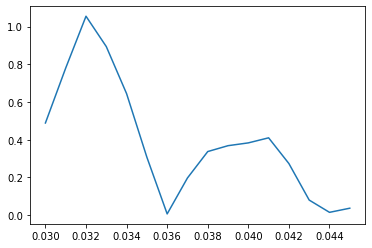

In [205]:
xxx = np.arange(0.03,0.046,0.001)
plt.plot(xxx,curvature_val)

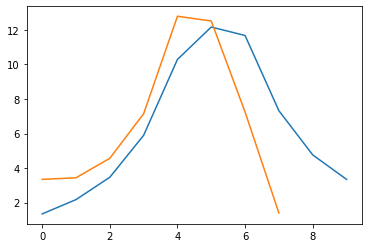

In [39]:
y=[1.34724860e+00,2.17550751e+00,3.46749349e+00,5.89381114e+00,1.02851727e+01,1.21613884e+01,1.16702395e+01,
7.31783234e+00,4.76344389e+00,3.34607571e+00]
z=[3.34607571e+00,3.43636733e+00,4.56581974e+00,7.14279251e+00,1.27849117e+01, 
1.25093933e+01,7.24278843e+00,1.39994517e+00]
plt.plot(y)
plt.plot(z)

In [40]:
#曲線下面積
from __future__ import print_function

import numpy as np
from scipy.integrate import simps
from numpy import trapz


# The y values.  A numpy array is used here,
# but a python list could also be used.
y = np.array([1.34724860e+00,2.17550751e+00,3.46749349e+00,5.89381114e+00,1.02851727e+01,1.21613884e+01,1.16702395e+01,
7.31783234e+00,4.76344389e+00,3.34607571e+00])

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=0.02)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=0.02)
print("area =", area)

area = 1.2016310225
area = 1.2053737343166668


In [41]:
from __future__ import print_function

import numpy as np
from scipy.integrate import simps
from numpy import trapz


# The y values.  A numpy array is used here,
# but a python list could also be used.
y = np.array([3.34607571e+00,3.43636733e+00,4.56581974e+00,7.14279251e+00,1.27849117e+01, 
1.25093933e+01,7.24278843e+00,1.39994517e+00])

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=0.02)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=0.02)
print("area =", area)

area = 1.001101669
area = 1.0109902271333333


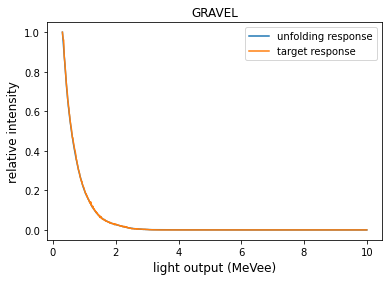

In [72]:
new_X= np.linspace(0.3, 10, num=990, endpoint=True)
u_measurement = np.dot(response,flux_total[:,-1])
plt.plot(new_X,u_measurement/max(u_measurement),label='unfolding response')
plt.plot(new_X,measurement/max(measurement),label='target response')
plt.xlabel('light output (MeVee)',fontsize=12)
plt.ylabel('relative intensity',fontsize=12)
plt.title('GRAVEL')
plt.legend()